<a href="https://colab.research.google.com/github/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/blob/master/Primeiros_passos_com_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@lucasoliveiras/primeiros-passos-com-kaggle-3871997b0868

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/test.csv')

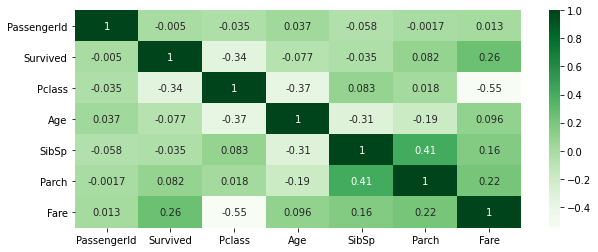

In [9]:
plt.figure(figsize=(10,4))
sns.heatmap(train.corr(), annot=True, cmap='Greens')

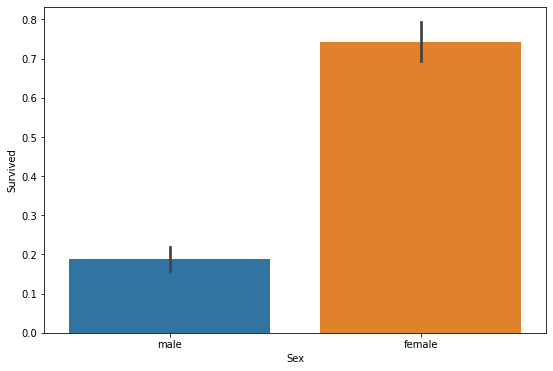

In [10]:
plt.figure(figsize=(9,6))
sns.barplot(x='Sex',y='Survived',data=train)

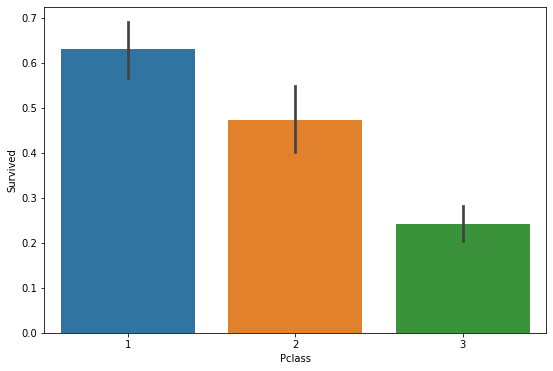

In [16]:
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=train)

In [0]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
train_numerico = train.drop(['Sex','Embarked'], axis=1)
test_numerico = test.drop(['Sex','Embarked'], axis=1)

imputer.fit(train_numerico)
train_no_null = imputer.transform(train_numerico)
imputer.fit(test_numerico)
test_no_null = imputer.transform(test_numerico)

train_tr = pd.DataFrame(train_no_null, columns=train_numerico.columns)
test_tr = pd.DataFrame(test_no_null, columns=test_numerico.columns)

train_tr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [24]:
train_cat = train[['Sex', 'Embarked']]
test_cat = test[['Sex', 'Embarked']]

train_cat_encoded = pd.get_dummies(train_cat)
test_cat_encoded = pd.get_dummies(test_cat)

train_cat_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [0]:
new_train = train_tr.join(train_cat_encoded)
new_test = test_tr.join(test_cat_encoded)

In [0]:
from sklearn.model_selection import train_test_split

predictors = new_train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

77.65


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.92
